# Interpolação Polinomial

A função abaixo, retorna os coeficientes do polinômio interpolante para os pontos $(x_i,f_i)$, $i = 1, \cdots,n$. A função "interp" recebe uma matrix $P$, tal que $P_{i1} = x_i$ e $P_{i2} = f_i$. 

In [1]:
function interp(P)
    # This function receives a matrix P (n x 2) and returns the coeficients
    # of polynomial interpolation of (x_i,f_i), i = 1, ..., n, where 
    # P[i,1]=x_i and P[i,2]=f_i.
    
    npoints = size(P,1);
    
    # Initiate Vandermonde matrix
    V = zeros(npoints,npoints);
    
    # Create Vandermonde matrix
    for i = 1 : npoints
        for j = 1 : npoints
            V[i,j] = P[i,1]^(j-1);
        end
    end
    
    # Solving the system
    sol = V \ P[:,2];
    
    return(sol);
end

interp (generic function with 1 method)

A função polyfit recebe a matrix $P$, que contem os pontos $(x_i,f_i)$ e $x \in \mathbb{R}$ e retorna o valor do polinômio interpolante no ponto $x$. 

In [2]:
function polyfit(x,P)
    np = size(P,1);
    
    # Coeficients of the interpolante polynomial
    α = interp(P);
    
    px = zeros(np,1);
    
    for i = 1 : np
        px[i] = x^(i-1);
    end
    
    z = α' * px;

    return(z[1]);
end

polyfit (generic function with 1 method)

As linhas a seguir são utilizadas para testar a função polyfit.

In [5]:
# Data for testing interp function
x0 = 1.0;
x1 = 5.0;
npoints = 5;
x = LinRange(x0,x1,npoints);
y = 10 * rand(npoints,1);
P = hcat(x,y);

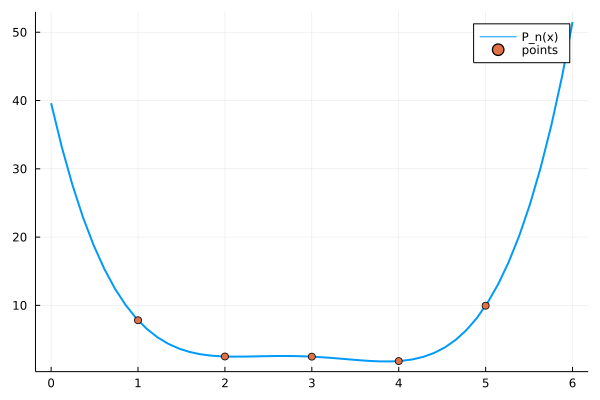

In [6]:
# Fazendo um gráfico para verificar a aproximação
using Plots;
points = 50;
t = LinRange(0,6,points);
z = zeros(points,1);
for i = 1 : points
    z[i] = polyfit(t[i],P);
end
plot(t,z,lw = 2,label="P_n(x)")
scatter!(P[:,1],P[:,2],label="points")

Note que o polinômio interpolante retorna valores exatos nos pontos de interpolação.